### to-do list:
- plot in task $2$ (graph/inferred graph);
- task $4$;
- task $5$;

## 1. Estimation of $\boldsymbol{J}$

### Maximum likelihood estimator
Our goal is to find the set of parameters $J_{i, j}(a, b)$ for all $i, j \in \{1, \dots, N\}$, $a, b \in \{1, \dots, q\}$ that maximises the likelihood
\begin{align*}
    \mathcal{L}\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right) & \coloneqq P\left(\left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right)
    = \prod_{m = 1}^{M} P\left(\boldsymbol{x}^{(m)} | \boldsymbol{J}\right) = \\
    & = \prod_{m = 1}^{M} \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right] = \\
    & = \frac{1}{Z(\boldsymbol{J})^M} \exp\left[\sum_{m = 1}^M \sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b}\right],
\end{align*}
<!-- remark: we keep using the letter P because it highlight the fact that we are talking about a density, not about the measure of a set -->
where
\begin{equation*}
    Z(\boldsymbol{J}) = \sum_{x_1, \dots, x_N = 1}^q \exp\left[\sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right]
\end{equation*}
is the normalization constant.
To this aim we compute the log-likelihood (and divide by $M$), getting
\begin{equation*}
    l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right) \coloneqq \left(\frac{1}{M} \sum_{m=1}^M\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \log{Z(\boldsymbol{J})}.
\end{equation*}
Deriving w.r.t. $J_{i, j}(a, b)$, for fixed $i, j, a, b$, we get
\begin{equation*}
	\frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} 
	= \left(\frac{1}{M} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \frac{1}{Z(\boldsymbol{J})} \frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)},
\end{equation*}
where
\begin{equation*}
	\frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)} = \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right].
\end{equation*}
Plugging into the previous expression, we find that
\begin{align*}
   \frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} & = \left(\frac{1}{M} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right] = \\
   & = \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}},
\end{align*}
where $\langle \cdot \rangle_{\rm{data}}$ stands for the empirical mean of the observations, $\langle \cdot \rangle_{\rm{model}}$ is the mean of $\delta_{(x_i, x_j), (a, b)}$ computed on the distribution of $\boldsymbol{x} | \boldsymbol{J}$ and $\delta$ denotes again the Kronecker delta
\begin{equation*}
	\delta_{(x_i, x_j), (a, b)} \coloneqq 
	\begin{cases}
		1 & \text{if } x_i = a \text{ and } x_j = b \\
		0 & \text{otherwise}
	\end{cases}.
\end{equation*}
Hence, in order to find the value of $J$ for which the function $\mathcal{L}\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)$ is maximised we have to impose
\begin{equation*}
	\frac{\partial l\left(\boldsymbol{J} | \left\{\boldsymbol{x}^{(m)}\right\}_{m = 1}^M\right)}{\partial J_{i,j}(a,b)} = 0 \iff \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} = \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}}.
\end{equation*}

### Boltzmann machine learning scheme

What we found can be exploited iteratively to estimate the coupling matrices through a gradient ascent algorithm (Boltzmann machine learning): $\forall i, j, a, b$
\begin{align*}
	& J_{i, j}^{0}(a, b) = 0, \\
	& J_{i, j}^{t + 1}(a, b) \leftarrow J_{i, j}^{t}(a, b) + \lambda \left[\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}(t)}\right], \ \forall t \geq 0.
\end{align*}
It is clear that at every step $t$ we should perform the computation of $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$ which costs $O(q^N)$, so we bypass the problem using a Metropolis-Hastings algorithm to sample from 
\begin{equation*}
	\pi_t\left(\boldsymbol{x}\right) \coloneqq \frac{1}{Z(\boldsymbol{J}^t)} \exp\left(\sum_{i, j = 1}^N J_{i, j}^{t}(x_i, x_j)\right)
\end{equation*}
and later estimate $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$:
- `set` an initial condition $\boldsymbol{x}^{0}$ (extract randomly from the $q^N$ possible configurations);
- `for` $s \in \{1, \dots, T_{\rm{burn-in}} + T_{\rm{tot}} \times T_{\rm{wait}}\}$:
	1. `draw` $\boldsymbol{x} \sim p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)$ with 
	\begin{align*}
		p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = 
		\begin{cases}
			\frac{1}{qN} & \text{if } \boldsymbol{x} = \left(x^{(s - 1)}_1, \dots, x^{(s - 1)}_{i - 1}, \left(x^{(s - 1)}_{i} + z\right) \text{ mod } q, x^{(s - 1)}_{i + 1}, \dots, x^{(s - 1)}_{N}\right), \ \forall i \in {1, \dots, N}, \forall z \in {1, \dots, q}\\
			0 & \text{otherwise}
		\end{cases};
	\end{align*}
	2. `compute` the acceptance ratio $a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)$:
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) & = \min\left\{1, \frac{p\left(\boldsymbol{x}^{(s - 1)}|\boldsymbol{x}\right) \pi_t(x)}{p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) \pi_t(x^{(s - 1)})}\right\} = \\
		& = \min\left\{1, \mathbf{1}_A(\boldsymbol{x}) \exp\left[\sum_{i, j = 1}^N J_{i, j}^{t}\left(x_i, x_j\right) - J_{i, j}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_j\right)\right]\right\},
	\end{align*}
	where we adopt the convention $\frac{p\left(\boldsymbol{x}^{(s - 1)}|\boldsymbol{x}\right)}{p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right)} = \mathbf{1}_A(\boldsymbol{x})$ with $A \coloneqq \left\{x \,|\, p\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) > 0\right\}$ (this notation has only a theoretical purpose).
	Now assuming 
	\begin{equation*}
		\boldsymbol{x} = \left(x^{(s - 1)}_1, \dots, x^{(s - 1)}_{k - 1}, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, x^{(s - 1)}_{k + 1}, \dots, x^{(s - 1)}_{N}\right),
	\end{equation*}
	we have
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = \min\Bigg\{1, & \exp\Bigg[\sum_{i \neq k} J_{i, k}^{t}\left(x^{(s - 1)}_i, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{i, k}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_k\right) + \\
		& + \sum_{j \neq k} J_{k, j}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, x^{(s - 1)}_j\right) - J_{k, j}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_j\right) + \\
		& + \Bigg(J_{k, k}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{k, k}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_k\right)\Bigg) \Bigg]\Bigg\}.
	\end{align*}
	By simmetry of $\boldsymbol{J}$, i.e. $J_{i, j}(a, b) = J_{j, i}(b, a)$, it holds
	\begin{align*}
		a\left(\boldsymbol{x}|\boldsymbol{x}^{(s - 1)}\right) = \min\Bigg\{1, & \exp\Bigg[2 \sum_{i \neq k} J_{i, k}^{t}\left(x^{(s - 1)}_i, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{i, k}^{t}\left(x^{(s - 1)}_i, x^{(s - 1)}_k\right) + \\
		& + \Bigg(J_{k, k}^{t}\left(\left(x^{(s - 1)}_{k} + z\right) \text{ mod } q, \left(x^{(s - 1)}_{k} + z\right) \text{ mod } q\right) - J_{k, k}^{t}\left(x^{(s - 1)}_k, x^{(s - 1)}_k\right)\Bigg) \Bigg]\Bigg\}.
	\end{align*}
	3. `draw` $u \sim U[0,1)$ (with the command `rand()`);
	4. `set`
	\begin{equation*}
		\boldsymbol{x}^{(s)} \coloneqq 
		\begin{cases}
			\boldsymbol{x} & \text{if } u \leq a \\
			\boldsymbol{x}^{(s - 1)} & \text{otherwise}
		\end{cases};
	\end{equation*}
- estimate $\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}}$ with $T_{\rm{tot}}$ configurations obtained removing the burn-in and the waiting times:
\begin{equation*}
	\langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model(t)}} \sim \frac{1}{T_{\rm{tot}}} \sum_{s = 1}^{T_{\rm{tot}}} \delta_{(x^{(s)}_i, x^{(s)}_j), (a, b)}.
\end{equation*}

### Code

In [20]:
# packages
using ProgressMeter
using Distributions
using DelimitedFiles
using Random

In [21]:
# remove randomization by setting a seed
Random.seed!(1);

In [22]:
function compute_stat(data::Matrix{Int64}, q::Int)
	count = size(data, 1)
	n = size(data, 2)
	δ_ijab = (zeros(q, q), ) .* ones(n, n)

	for i in 1:n, j in 1:n, a in 1:q, b in 1:q
		for s in 1:count
			δ_ijab[i, j][a, b] += (data[s, i] == a) * (data[s, j] == b)
		end
	end
	δ_ijab /= count

	return δ_ijab
end;

In [23]:
function maxabs_matmat(m::Matrix{Matrix{Float64}})
	max = -1
	for r in 1:size(m, 1), c in 1:size(m, 2)
		if maximum(abs.(m[r, c])) > max
			max = maximum(abs.(m[r, c]))
		end
	end

	return max
end;

In [24]:
function metropolis_hastings_step(x::Vector{Int64}, J::Matrix{Matrix{Float64}})
	n = length(x)

	# 1. draw uniformly an index and a new configuration
	k = rand(1:n)
	z = rand(1:q)
	
	# 2. compute the acceptance ratio
	a = 0
	xk_new = mod1(x[k] + z, q)
	for i in 1:n
		if i != k
			a += J[i, k][x[i], xk_new] - J[i, k][x[i], x[k]]
		end
	end
	a *= 2
	a += J[k, k][xk_new, xk_new] - J[k, k][x[k], x[k]]
	a = exp(a)
	a = min(1, a)

	# 3/4. decide whether to accept or not the new configuration
	if rand() < a
		x[k] = xk_new
	end
	
	return x
end;

In [25]:
function boltzmann_ml(δ_ijab_data::Matrix{Matrix{Float64}}, J::Matrix{Matrix{Float64}}, 
					t_burnin::Int64, t_tot::Int64, t_wait::Int64, t_max::Int64;
					λ::Float64 = 0.1, ε_max::Float64 = 1e-2)
	n = size(δ_ijab_data, 1)
	q = size(δ_ijab_data[1, 1], 1)
	
	x = sample(collect(1:q), n, replace = true)
	x_model = zeros(Int64, t_tot, n)
	δ_ijab_model = (zeros(q, q), ) .* ones(n, n)

	t = 0
	ε = 1
	ProgressMeter.ijulia_behavior(:clear)
	p = ProgressUnknown("learning...", spinner = true)

	while t <= t_max && ε > ε_max
		t += 1
		fill!(x_model, 0)
		x = sample(collect(1:q), n, replace = true)

		for s in 1:t_burnin
			x = metropolis_hastings_step(x, J)
		end
		for s in 1:t_tot
			for r in 1:t_wait
				x = metropolis_hastings_step(x, J)
			end
			x_model[s, :] = x
		end
		
		δ_ijab_model = compute_stat(x_model, q)
		J = J + λ .* (δ_ijab_data - δ_ijab_model)
	
		ε = maxabs_matmat(δ_ijab_data - δ_ijab_model)

		if mod(t, t_max ÷ 10) == 0
			ProgressMeter.next!(p; showvalues = [(:t, t), (:ε, ε)], spinner = "⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏")
		end
	end

	ProgressMeter.finish!(p)

	return δ_ijab_model, J, x_model, t, ε
end;

In [26]:
# parameters
n = 5
q = 4

# the estimation is also acceptable by imposing
# t_burnin = 250
# t_tot = 250
# t_wait = 100
# t_max = 500

t_burnin = 500
t_tot = 500
t_wait = 100
t_max = 500;

In [27]:
# δ_ijab_data
x_data = readdlm("data.dat", Int)
δ_ijab_data = compute_stat(x_data, q);

In [28]:
# boltzmann ml scheme
J = (zeros(q, q), ) .* ones(n, n)
δ_ijab_model, J, x_model, t, ε = boltzmann_ml(δ_ijab_data, J, t_burnin, t_tot, t_wait, t_max);

⠋ learning... 	 Time: 0:00:04
  t:  100
  ε:  0.04100000000000001

⠙ learning... 	 Time: 0:00:06
  t:  150
  ε:  0.04299999999999998

⠹ learning... 	 Time: 0:00:08
  t:  200
  ε:  0.04300000000000001

⠸ learning... 	 Time: 0:00:10
  t:  250
  ε:  0.045499999999999985

⠼ learning... 	 Time: 0:00:12
  t:  300
  ε:  0.025500000000000002

⠴ learning... 	 Time: 0:00:14
  t:  350
  ε:  0.038500000000000006

⠦ learning... 	 Time: 0:00:17
  t:  400
  ε:  0.04149999999999998

⠧ learning... 	 Time: 0:00:19
  t:  450
  ε:  0.05399999999999999

⠇ learning... 	 Time: 0:00:21
  t:  500
  ε:  0.03999999999999998

✓ learning... 	 Time: 0:00:21


## 2. Computation of $\mathcal{F}_{i, j}$

### Frobenius norm

In the previous point we estimated the parameter $\boldsymbol{J}$ through a Boltzmann machine learning scheme and now we call that parameter $\boldsymbol{J}^\star$.

We define for $i, j \in \{1, \dots, N\}$ the Frobenius norm of $J_{i, j}^{\star}$ as
\begin{equation*}
	\mathcal{F}_{i, j} = \sqrt{\sum_{a, b = 1}^{q} J^{\star}_{i, j}(a, b)^2}.
\end{equation*}

### Code

In [29]:
# packages
using LaTeXStrings
using Plots

In [30]:
function frobenius_norm(m::Matrix{Float64})
	f = 0
	for r in 1:size(m, 1), c in 1:size(m, 2)
		f += m[r, c]^2
	end
	f = sqrt(f)
end;

In [31]:
# computation of f_{i, j} for all i, j
f = zeros(n, n)
for i in 1:n, j in 1:n
	f[i, j] = frobenius_norm(J[i, j])
end
display(f)

neighbors = [Int64[], Int64[], Int64[], Int64[], Int64[]]
for i in 1:n, j in 1:n
	if (f[i, j] > 0.2)
		append!(neighbors[i], [j])
	end
end
neighbors = mapreduce(permutedims, vcat, neighbors)
display(neighbors)

5×5 Matrix{Float64}:
 0.0218726  0.730774   0.840845   0.174598   0.110648
 0.730774   0.0177385  0.131686   0.807782   0.119461
 0.840845   0.131686   0.0259589  0.0955901  0.897827
 0.174598   0.807782   0.0955901  0.0285117  0.918476
 0.110648   0.119461   0.897827   0.918476   0.0127939

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

In [32]:
groundtruth = readdlm("groundtruth.dat", Int)
display(groundtruth)

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

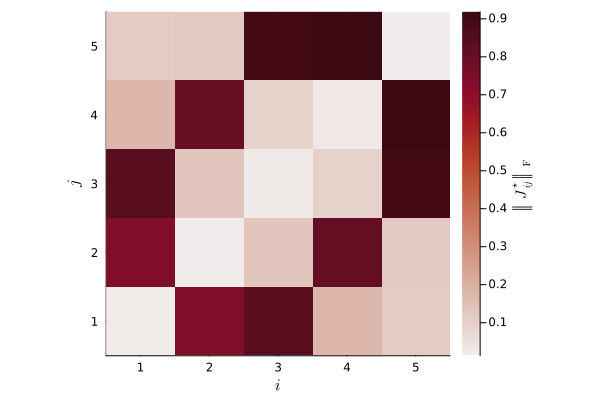

In [33]:
heatmap(f, xlabel = L"i", ylabel = L"j", colorbar_title = L"\left\Vert J^{\star}_{ij} \right\Vert_{\operatorname{F}}", aspect_ratio = 1, xlim = (0.5, 5.5), c = :amp)

## 3. Bayesian approach

### Posterior density

From the bayesian theory we recall that the posterior distribution of the parameter $\boldsymbol{J}$ (up to a positive multiplicative constant) is such that
\begin{align*}
	P\left(\boldsymbol{J} | \left\{x^{(m)}\right\}_{m = 1}^M \right) & \propto P\left(\left\{x^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right) P\left(\boldsymbol{J}\right) = \\
	& = \frac{1}{Z(\boldsymbol{J})^M} \exp\left[\sum_{m = 1}^M \sum_{i, j = 1}^N \sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b}\right]\frac{1}{Z\left(\boldsymbol{J}\right)}\exp\left[-\lambda \sum_{i, j = 1}^N \sum_{a, b = 1}^{q} \left|J_{i, j}(a, b)\right|\right] = \\
	& = \frac{1}{Z\left(\boldsymbol{J}\right)^{M + 1}} \exp\left[\sum_{i, j = 1}^N \left(\sum_{m = 1}^M J_{i, j}(x_i^{(m)}, x_j^{(m)}) - \lambda \sum_{a, b = 1}^{q} \left|J_{i, j}(a, b)\right|\right)\right],
\end{align*}
where the previous chain of equations follows from the definition of conditional density.

Our objective is to modify the Boltzmann machine learning scheme in order to include the posterior distribution just computed.
This can be done in several ways by substituting the classical maximum likelihood estimation of the parameter $\boldsymbol{J}$ with a Bayes estimation. To do so we have to set up a decision theory framework. 

### Maximum a posteriori estimation

We follow the classical Bayesian approach and introduce a loss function $L(\theta, \hat{\theta})$ and its related risk function $R(\hat{\theta})$ as follows
\begin{align*}
	& L(\theta, \hat{\theta}) \coloneqq 1 - \delta(\hat{\theta} - \theta) \\
	& \begin{aligned}
		R(\hat{\theta}) & \coloneqq \mathbb{E}_{\theta | x}\left[L(\theta, \hat{\theta})\right] = \int_{\Theta} L(\theta, \hat{\theta}) p(\theta | x) d\theta = \\
		& \ = 1 - \int_{\Theta} \delta(\hat{\theta} - \theta) p(\theta | x) d\theta = \\
		& \ = 1 - p(\hat{\theta} | x),
	\end{aligned}
\end{align*}
where $\delta$ is the Dirac delta function (here we are committing a huge abuse of notation: we are using $\delta$ as the Radon-Nikodym derivative of the dirac measure but it does not exists such a derivative; we will formalize it in the very end of this section). We used the so-called $0-1$-loss function in order to obtain an eastimator easy to compute. 

Hence, by minimizing the risk function, one obtains a maximum a posteriori (MAP) estimate of $\theta$ which is
\begin{align*}
	\hat{\theta}_{\rm{MAP}} & = \operatorname*{argmin}_{\theta \in \Theta} R(\theta) = \\
	& = \operatorname*{argmin}_{\theta \in \Theta} 1 - p(\theta | x) = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} p(\theta | x) = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} \frac{p(x | \theta) p(\theta)}{\int_{\Theta} p(x | \theta) p(\theta) d\theta} = \\
	& = \operatorname*{argmax}_{\theta \in \Theta} p(x | \theta) p(\theta).
\end{align*}

So defining a new *likelihood function* $\mathcal{L}_{\rm{MAP}}(\theta) \coloneqq p(x | \theta) p(\theta)$ one obtains
\begin{equation*}
	\hat{\theta}_{\rm{MAP}} = \operatorname*{argmax}_{\theta \in \Theta} \mathcal{L}_{\rm{MAP}}(\theta).
\end{equation*}
Moreover, if $l_{\rm{MAP}}(\theta) \coloneqq \log{\mathcal{L}_{\rm{MAP}}(\theta)}$, it holds
\begin{equation*}
	l_{\rm{MAP}}(\theta) = \log{p(x | \theta) p(\theta)} = l_{\rm{ML}}(\theta) + \log{p(\theta)},
\end{equation*}
where $l_{\rm{ML}}(\theta)$ is the classical log-likelihood function used in maximum likelihood estimation.

Actually, in order to be formal, one should define a family of loss function $\forall \varepsilon > 0$ as follows:
\begin{align*}
	& L_{\varepsilon}(\theta, \hat{\theta}) \coloneqq 1 - \mathbf{1}_{(-\varepsilon, \varepsilon)}(\hat{\theta} - \theta) \\
	& \begin{aligned}
		R_{\varepsilon}(\hat{\theta}) & = \mathbb{E}_{\theta | x}\left[L_{\varepsilon}(\theta, \hat{\theta})\right] = \\
		& = 1 - \int_{-\hat{\theta} - \varepsilon}^{\hat{\theta} + \varepsilon} p(\theta | x) d\theta.
	\end{aligned}
\end{align*}
Then, by taking $\varepsilon \to 0$, one obtains the risk used above, i.e. $R(\hat{\theta}) = 1 - p(\hat{\theta} | x)$.

### Estimation of $\boldsymbol{J}$ with MAP

Following the procedure just introduced we can compute $l_{\rm{MAP}}(\boldsymbol{J})$
\begin{align*}
	l_{\rm{MAP}}(\boldsymbol{J}) & = \log\left(P\left(\left\{x^{(m)}\right\}_{m = 1}^M | \boldsymbol{J}\right) P\left(\boldsymbol{J}\right)\right)= \\
	& = \log\left(\frac{1}{Z\left(\boldsymbol{J}\right)^{M + 1}} \exp\left[\sum_{i, j = 1}^N \sum_{a, b = 1}^q \left(\sum_{m = 1}^M J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b} - \lambda \left|J_{i, j}(a, b)\right|\right)\right]\right) = \\
	& = \sum_{i, j = 1}^N \sum_{a, b = 1}^q \left(\sum_{m = 1}^M J_{i, j}(a, b) \ \delta_{x_i^{(m)}, a}\ \delta_{x_j^{(m)}, b} - \lambda \left|J_{i, j}(a, b)\right|\right) - (M + 1) \log{Z\left(\boldsymbol{J}\right)}.
\end{align*}
Then we derive it w.r.t. $J_{i, j}(a, b)$, for fixed $i, j, a, b$, assuming that $\frac{d |x|}{dx} = \operatorname{sgn}(x)$ where, by convention, we assume $\operatorname{sgn}(0) = 1$:
\begin{equation*}
    \frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)} 
	= \left(\sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b} - \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right) - \frac{M + 1}{Z(\boldsymbol{J})} \frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)},
\end{equation*}
where we recall that
\begin{equation*}
    \frac{\partial Z(\boldsymbol{J})}{\partial J_{i, j}(a, b)} = \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right].
\end{equation*}
Dividing by $M + 1$ (observe that this operation is safe because a scaling does not modify the *direction* of the derivative) we obtain
\begin{align*}
    \frac{1}{M + 1}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)} & = \left(\frac{1}{M + 1} \sum_{m = 1}^M \delta_{x_i^{(m)}, a} \ \delta_{x_j^{(m)}, b}\right) - \left(\frac{1}{M + 1} \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right) + \\
	& \kern{13pt} - \sum_{x_1, \dots, x_N = 1}^q \delta_{x_i,a} \ \delta_{x_j,b} \ \frac{1}{Z(\boldsymbol{J})} \exp\left[\sum_{i, j = 1}^N\sum_{a, b = 1}^q J_{i, j}(a, b) \ \delta_{x_i, a} \ \delta_{x_j, b}\right] = \\
	& = \frac{M}{M+1} \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{data}} - \langle \delta_{(x_i, x_j), (a, b)} \rangle_{\rm{model}} - \left(\frac{1}{M + 1} \lambda \operatorname{sgn}\left(J_{i, j}(a, b)\right)\right).
\end{align*}

### Boltzmann machine learning scheme

As we did in point 1 we set up another Boltzmann machine learning scheme in order to infer $\boldsymbol{J}$ by taking in account the prior distribution of $P\left(\boldsymbol{J}\right)$: $\forall i, j, a, b$
\begin{align*}
	& J_{i, j}^{0}(a, b) = 0, \\
	& J_{i, j}^{t + 1}(a, b) \leftarrow J_{i, j}^{t}(a, b) + \mu \left[\frac{1}{M + 1}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)}\right], \ \forall t \geq 0.
\end{align*}
Note that we are already able to compute all the terms of $\frac{1}{M + 1}\frac{\partial l_{\rm{MAP}}(\boldsymbol{J})}{\partial J_{i,j}(a,b)}$ so we can directly proceed with the numerical estimation of $\boldsymbol{J}$. 

### Code

In [34]:
function sgn(x::Float64)
	if x >= 0
		return 1
	else
		return -1
	end
end;

In [35]:
function boltzmann_ml_bayes(δ_ijab_data::Matrix{Matrix{Float64}}, J::Matrix{Matrix{Float64}},
					count::Int64, λ::Int64, t_burnin::Int64, t_tot::Int64, t_wait::Int64, t_max::Int64;
					μ::Float64 = 0.1, ε_max::Float64 = 1e-2)
	n = size(δ_ijab_data, 1)
	q = size(δ_ijab_data[1, 1], 1)

	bayes_term = (zeros(q, q), ) .* ones(n, n)
	for i in 1:n, j in 1:n, a in 1:q, b in 1:q
		bayes_term[i, j][a, b] = 1 / (count + 1) * λ * sgn(J[i, j][a, b])
	end
	
	x = sample(collect(1:q), n, replace = true)
	x_model = zeros(Int64, t_tot, n)
	δ_ijab_model = (zeros(q, q), ) .* ones(n, n)

	t = 0
	ε = 1
	ProgressMeter.ijulia_behavior(:clear)
	p = ProgressUnknown("learning...", spinner = true)

	while t <= t_max && ε > ε_max
		t += 1
		fill!(x_model, 0)
		x = sample(collect(1:q), n, replace = true)

		for s in 1:t_burnin
			x = metropolis_hastings_step(x, J)
		end
		for s in 1:t_tot
			for r in 1:t_wait
				x = metropolis_hastings_step(x, J)
			end
			x_model[s, :] = x
		end
		
		δ_ijab_model = compute_stat(x_model, q)

		direction_bayes = (count / (count + 1) * δ_ijab_data - δ_ijab_model - bayes_term)
		J = J + μ .* direction_bayes
	
		ε = maxabs_matmat(direction_bayes)

		if mod(t, t_max ÷ 10) == 0
			ProgressMeter.next!(p; showvalues = [(:t, t), (:ε, ε)], spinner = "⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏")
		end
	end

	ProgressMeter.finish!(p)

	return δ_ijab_model, J, x_model, t, ε
end;

In [36]:
# boltzmann ml scheme
count = size(x_data, 1)
λ = 0.1
J_bayes = (zeros(q, q), ) .* ones(n, n)
δ_ijab_model_bayes, J_bayes, t_bayes, ε_bayes = boltzmann_ml(δ_ijab_data, J, t_burnin, t_tot, t_wait, t_max);

⠋ learning... 	 Time: 0:00:04
  t:  100
  ε:  0.045999999999999985

⠙ learning... 	 Time: 0:00:06
  t:  150
  ε:  0.034499999999999996

⠹ learning... 	 Time: 0:00:08
  t:  200
  ε:  0.03649999999999998

⠸ learning... 	 Time: 0:00:10
  t:  250
  ε:  0.0335

⠼ learning... 	 Time: 0:00:12
  t:  300
  ε:  0.03199999999999997

⠴ learning... 	 Time: 0:00:14
  t:  350
  ε:  0.03949999999999998

⠦ learning... 	 Time: 0:00:16
  t:  400
  ε:  0.038500000000000006

⠧ learning... 	 Time: 0:00:18
  t:  450
  ε:  0.03900000000000001

⠇ learning... 	 Time: 0:00:20
  t:  500
  ε:  0.05350000000000002

✓ learning... 	 Time: 0:00:20


In [37]:
# replication of point 2 with J_bayes
f_bayes = zeros(n, n)
for i in 1:n, j in 1:n
	f_bayes[i, j] = frobenius_norm(J_bayes[i, j])
end
display(f_bayes)

neighbors_bayes = [Int64[], Int64[], Int64[], Int64[], Int64[]]
for i in 1:n, j in 1:n
	if (f_bayes[i, j] > 0.2)
		append!(neighbors_bayes[i], [j])
	end
end
neighbors_bayes = mapreduce(permutedims, vcat, neighbors_bayes)
display(neighbors_bayes)

5×5 Matrix{Float64}:
 0.0244598  0.764497   0.864228   0.165538   0.12042
 0.764497   0.0266657  0.138922   0.83158    0.110502
 0.864228   0.138922   0.0214974  0.110738   0.924887
 0.165538   0.83158    0.110738   0.0368356  0.943671
 0.12042    0.110502   0.924887   0.943671   0.0191097

5×2 Matrix{Int64}:
 2  3
 1  4
 1  5
 2  5
 3  4

In [38]:
# comparison J, J_bayes
display(f_bayes)
display(f)
display([minimum(f_bayes - f), maximum(f_bayes - f)])
display(maxabs_matmat(J_bayes - J))

5×5 Matrix{Float64}:
 0.0244598  0.764497   0.864228   0.165538   0.12042
 0.764497   0.0266657  0.138922   0.83158    0.110502
 0.864228   0.138922   0.0214974  0.110738   0.924887
 0.165538   0.83158    0.110738   0.0368356  0.943671
 0.12042    0.110502   0.924887   0.943671   0.0191097

5×5 Matrix{Float64}:
 0.0218726  0.730774   0.840845   0.174598   0.110648
 0.730774   0.0177385  0.131686   0.807782   0.119461
 0.840845   0.131686   0.0259589  0.0955901  0.897827
 0.174598   0.807782   0.0955901  0.0285117  0.918476
 0.110648   0.119461   0.897827   0.918476   0.0127939

2-element Vector{Float64}:
 -0.009059882525756374
  0.03372271023403406

0.02470000000000004